In [1]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

In [2]:
# Importing dataset
train =pd.read_csv('/content/drive/MyDrive/Data Science internship june 2022/Dataset/Black Friday Sales/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data Science internship june 2022/Dataset/Black Friday Sales/test.csv')

In [3]:
train.shape

(550068, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


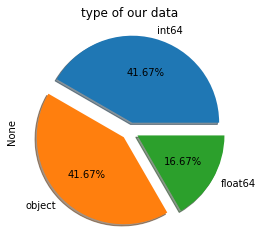

In [5]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');

In [6]:
# show the numirical values

num_columns = [f for f in train.columns if train.dtypes[f] != 'object']
num_columns.remove('Purchase')
num_columns.remove('User_ID')
num_columns

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [7]:
# show the categorical values

cat_columns = [f for f in train.columns if train.dtypes[f] == 'object']
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [8]:
train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [9]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


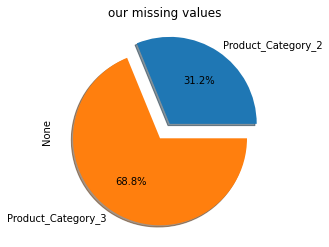

In [10]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('our missing values');

In [11]:
train.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [12]:
train.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [13]:
# Replace using median 
median = train['Product_Category_2'].median()
train['Product_Category_2'].fillna(median, inplace=True)

In [14]:
train.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [15]:
# drop Product_Category_3 
train=train.drop('Product_Category_3',axis=1)

In [16]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


In [17]:
train = train.drop(['Product_ID','User_ID'],axis=1)

In [18]:
# checking the new shape of data
print(train.shape)
train

(550068, 9)


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.0,368
550064,F,26-35,1,C,3,0,20,9.0,371
550065,F,26-35,15,B,4+,1,20,9.0,137
550066,F,55+,1,C,2,0,20,9.0,365


In [19]:
df_Gender = pd.get_dummies(train['Gender'])
df_Age = pd.get_dummies(train['Age'])
df_City_Category = pd.get_dummies(train['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])

data_final= pd.concat([train, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [20]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
data_final

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,...,51-55,55+,A,B,C,0,1,2,3,4+
0,10,0,3,9.0,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,9.0,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,9.0,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,9.0,368,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
550064,1,0,20,9.0,371,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
550065,15,1,20,9.0,137,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
550066,1,0,20,9.0,365,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [21]:
data_final.dtypes

Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
F                       uint8
M                       uint8
0-17                    uint8
18-25                   uint8
26-35                   uint8
36-45                   uint8
46-50                   uint8
51-55                   uint8
55+                     uint8
A                       uint8
B                       uint8
C                       uint8
0                       uint8
1                       uint8
2                       uint8
3                       uint8
4+                      uint8
dtype: object

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

x=data_final.drop('Purchase',axis=1)
y=data_final.Purchase

print(x.shape)
print(y.shape)

(550068, 21)
(550068,)


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lr = LinearRegression()
train=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [32]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(normalize=False)

In [33]:
print('Intercept parameter:', lr.intercept_)
coeff_df = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 9266.19544337043
                     Coefficient
Occupation          3.939533e+01
Marital_Status     -2.095463e+01
Product_Category_1 -1.643918e+03
Product_Category_2 -2.531927e+02
F                  -3.263889e+15
M                  -3.263889e+15
0-17                9.773156e+15
18-25               2.300827e+16
26-35               2.927494e+16
36-45               2.390774e+16
46-50               1.649140e+16
51-55               1.528338e+16
55+                 1.160622e+16
A                  -4.149399e+15
B                  -4.619844e+15
C                  -4.332533e+15
0                  -2.317507e+15
1                  -3.240077e+15
2                  -2.636602e+15
3                  -2.568891e+15
4+                 -2.445384e+15


In [34]:
predictions = lr.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [10412.07044337 11395.32044337 10763.32044337 ...  6507.32044337
 11381.07044337  8632.07044337]


In [36]:
lm=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lm

,Actual,Predicted
431625,10648,10412.070443
374764,19432,11395.320443
528540,10601,10763.320443
307793,10057,7481.320443
364848,5265,9442.195443
...,...,...
55303,9539,11102.070443
255206,9924,7922.195443
6997,3140,6507.320443
387513,15362,11381.070443


In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3602.51527638071
MSE: 22107652.10870278
